In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/client_data_5000.csv')

In [4]:
data.head()

,client_id,client_name,policy_type,policy_start_date,annual_premium,claims_last_3_years,communication_frequency,client_tenure_years,last_contact_date,industry,region
0,1001,"Rodriguez, Figueroa and Sanchez",Commercial Auto,2022-04-09,4811.91,0,Annually,6,2024-06-17,Construction,Durham
1,1002,Doyle Ltd,Commercial Auto,2017-05-10,10243.22,3,Quarterly,9,2024-09-02,Construction,Durham
2,1003,"Mcclain, Miller and Henderson",Property,2020-01-30,12951.29,0,Quarterly,6,2024-07-02,Technology,Durham
3,1004,Davis and Sons,General Liability,2022-12-18,7442.15,3,Annually,3,2024-07-15,Manufacturing,Durham
4,1005,"Guzman, Hoffman and Baldwin",General Liability,2018-11-13,12113.78,2,Annually,4,2025-04-11,Construction,Durham


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                5000 non-null   int64  
 1   client_name              5000 non-null   object 
 2   policy_type              5000 non-null   object 
 3   policy_start_date        5000 non-null   object 
 4   annual_premium           5000 non-null   float64
 5   claims_last_3_years      5000 non-null   int64  
 6   communication_frequency  5000 non-null   object 
 7   client_tenure_years      5000 non-null   int64  
 8   last_contact_date        5000 non-null   object 
 9   industry                 5000 non-null   object 
 10  region                   5000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 429.8+ KB


In [6]:
data.describe()

,client_id,annual_premium,claims_last_3_years,client_tenure_years
count,5000.000000,5000.000000,5000.0000,5000.000000
mean,3500.500000,11457.539956,2.5052,5.436600
std,1443.520003,4880.053279,1.6971,2.917547
min,1001.000000,3003.330000,0.0000,1.000000
25%,2250.750000,7207.107500,1.0000,3.000000
50%,3500.500000,11458.950000,3.0000,5.000000
75%,4750.250000,15607.187500,4.0000,8.000000
max,6000.000000,19999.220000,5.0000,10.000000


In [7]:
data.isnull().sum()


client_id                  0
client_name                0
policy_type                0
policy_start_date          0
annual_premium             0
claims_last_3_years        0
communication_frequency    0
client_tenure_years        0
last_contact_date          0
industry                   0
region                     0
dtype: int64

In [8]:
data["policy_type"].value_counts()

policy_type
Cyber                 1018
Errors & Omissions    1016
Property               996
Commercial Auto        985
General Liability      985
Name: count, dtype: int64

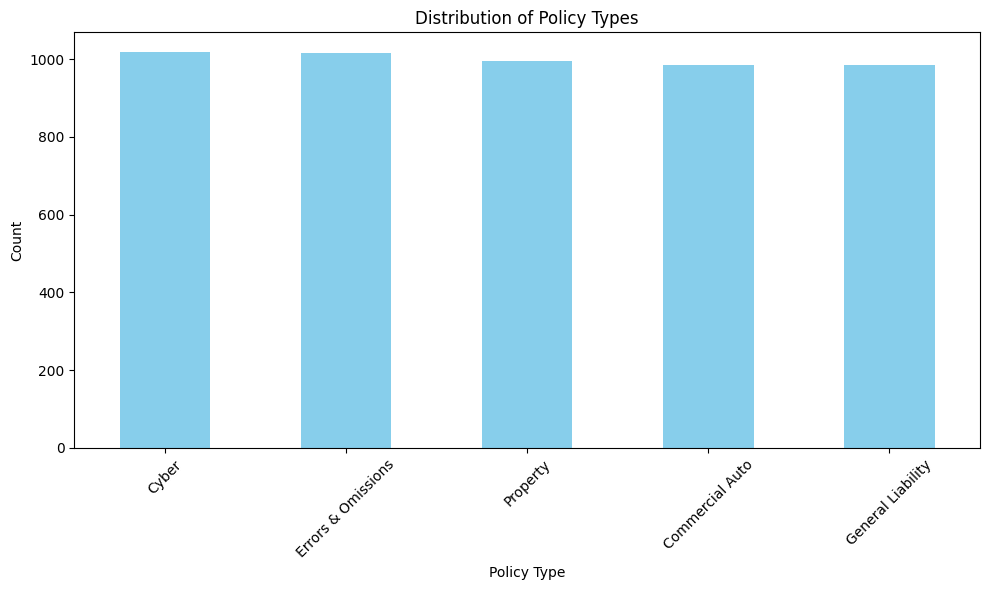

In [9]:
# 1. Distribution of policy types
plt.figure(figsize=(10, 6))
policy_counts = data['policy_type'].value_counts()
policy_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Policy Types')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

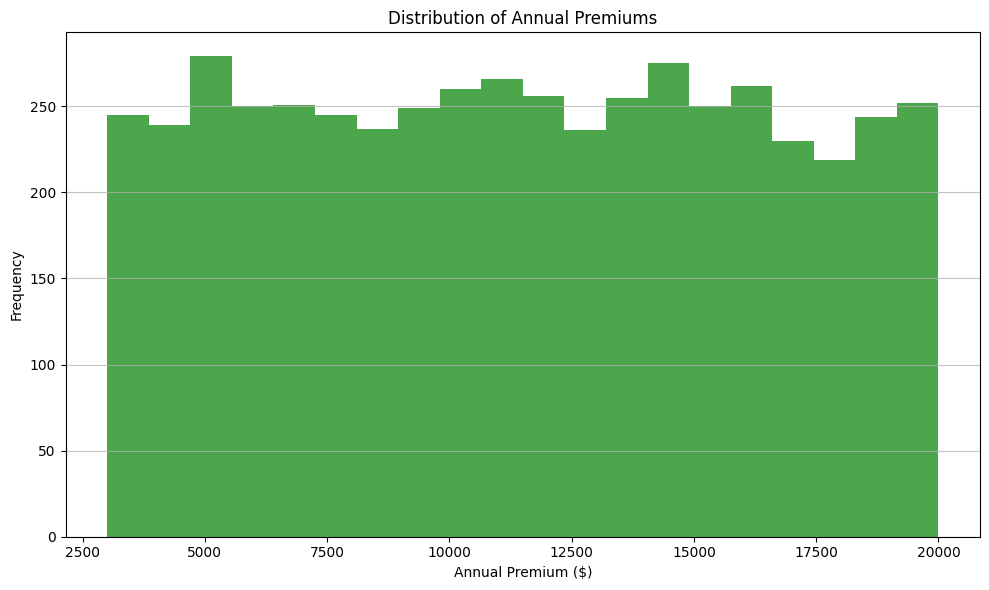

In [10]:
# 2. Annual premium distribution
plt.figure(figsize=(10, 6))
plt.hist(data['annual_premium'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Annual Premiums')
plt.xlabel('Annual Premium ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

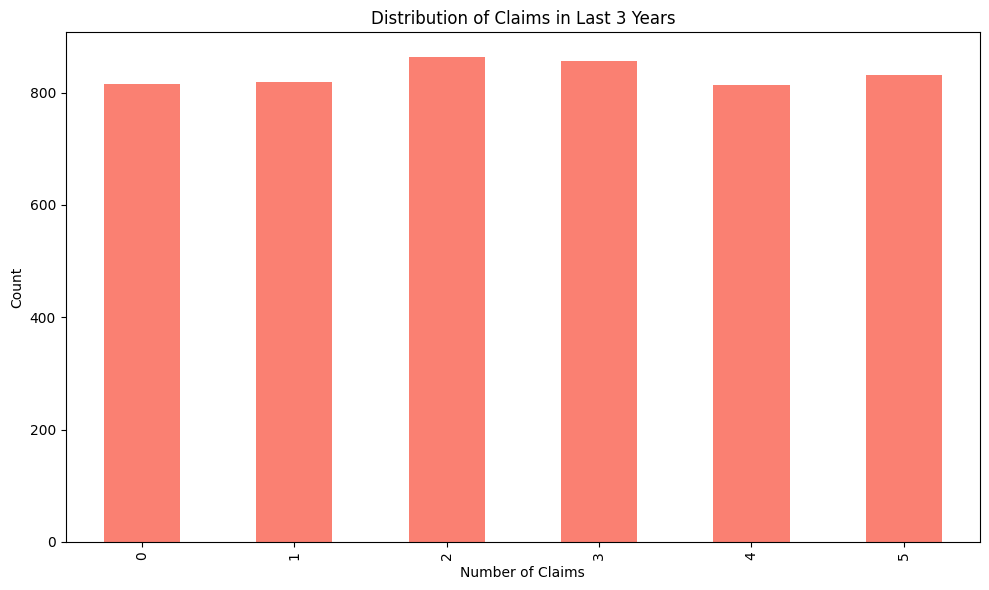

In [11]:
# 3. Claims distribution
plt.figure(figsize=(10, 6))
claims_counts = data['claims_last_3_years'].value_counts().sort_index()
claims_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Claims in Last 3 Years')
plt.xlabel('Number of Claims')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

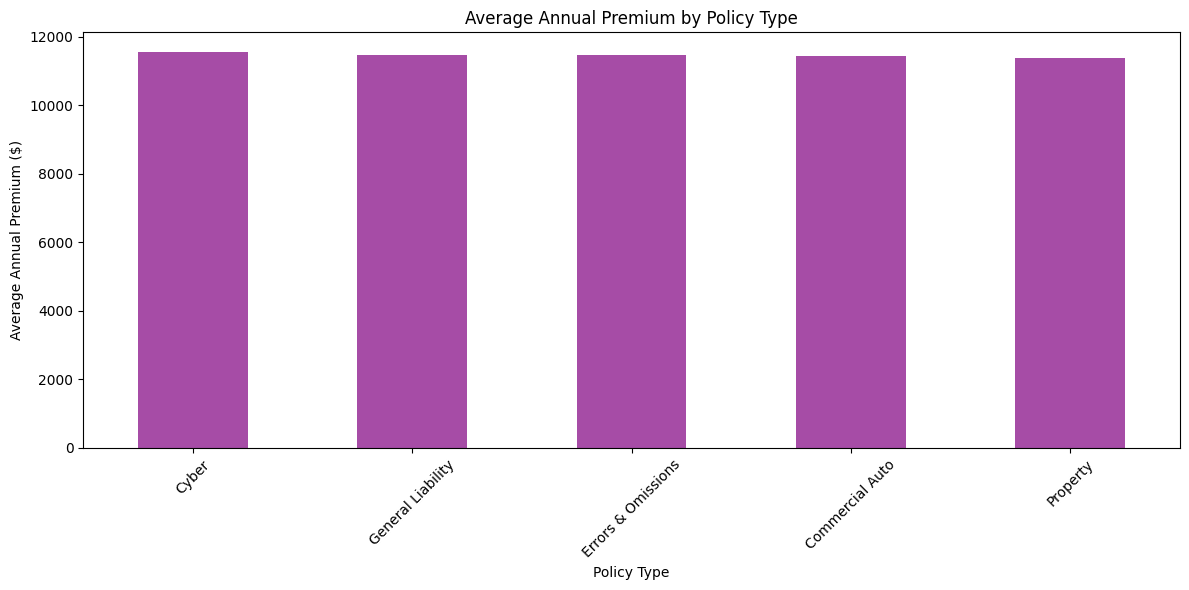

In [12]:
# 4. Average premium by policy type
plt.figure(figsize=(12, 6))
avg_premium_by_policy = data.groupby('policy_type')['annual_premium'].mean().sort_values(ascending=False)
avg_premium_by_policy.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Annual Premium by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Average Annual Premium ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

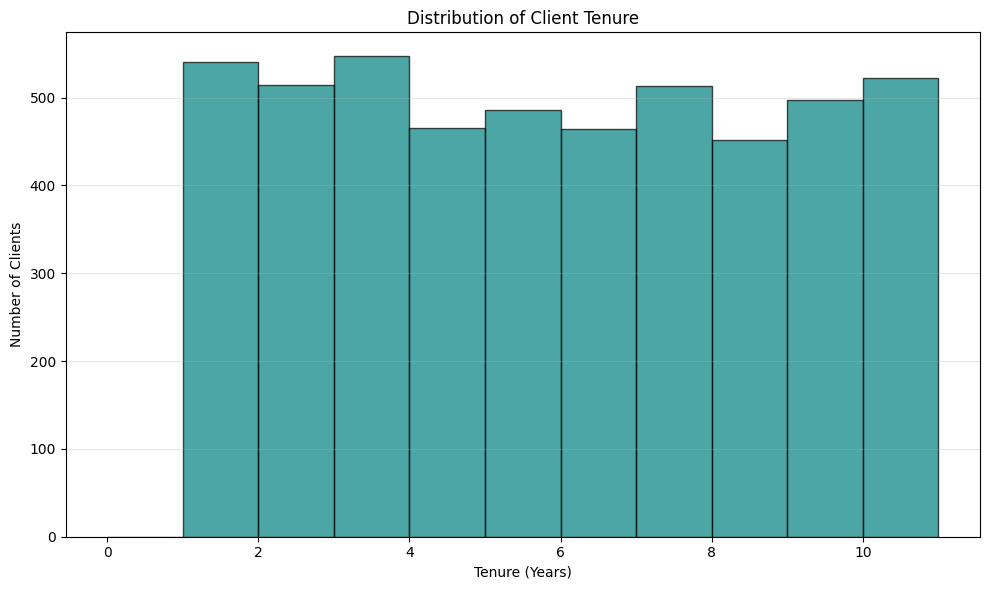

In [13]:
# 5. Client tenure distribution
plt.figure(figsize=(10, 6))
plt.hist(data['client_tenure_years'], bins=range(0, int(data['client_tenure_years'].max()) + 2), 
         color='teal', alpha=0.7, edgecolor='black')
plt.title('Distribution of Client Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Clients')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

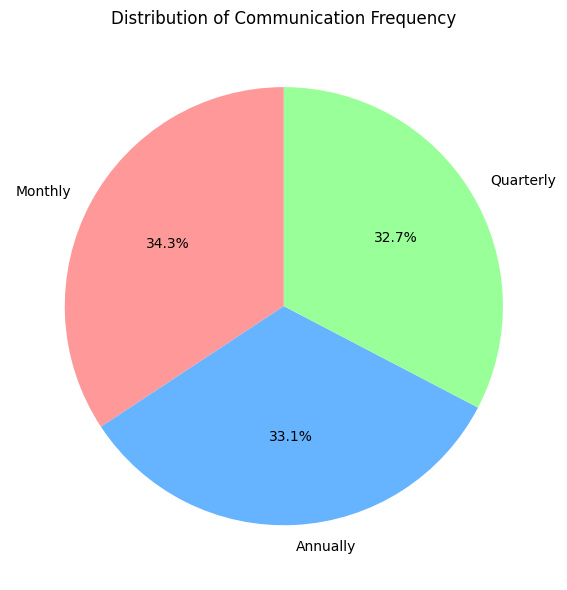

In [14]:
# 6. Communication frequency distribution
plt.figure(figsize=(10, 6))
comm_counts = data['communication_frequency'].value_counts()
comm_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                 colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Communication Frequency')
plt.ylabel('')
plt.tight_layout()
plt.show()

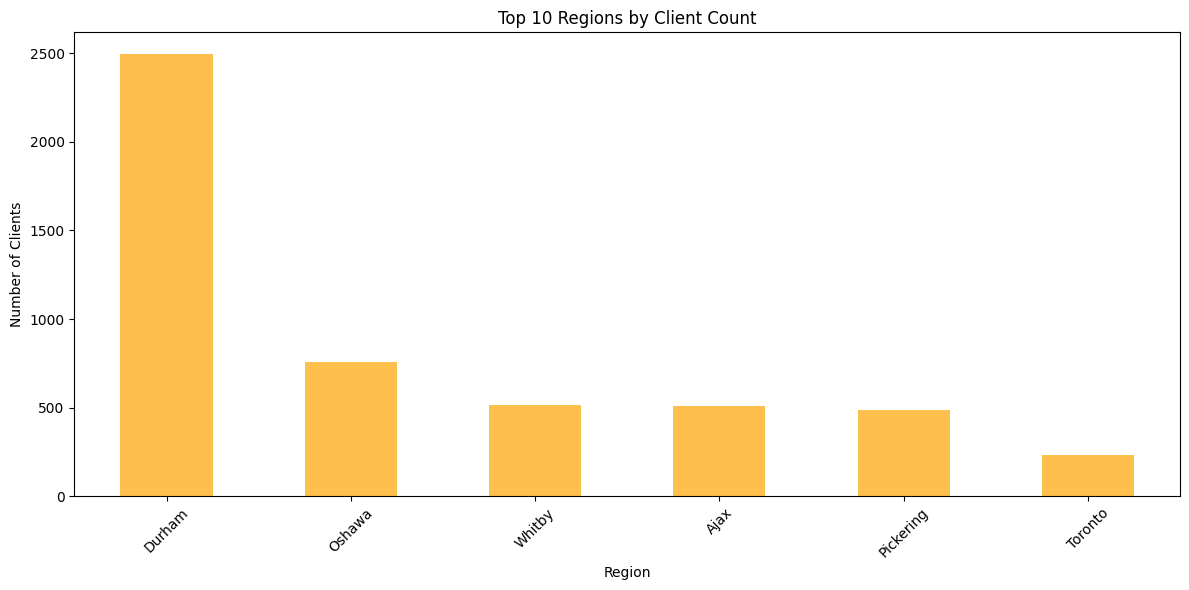

In [15]:
# 7. Region distribution
plt.figure(figsize=(12, 6))
region_counts = data['region'].value_counts().head(10)  # Top 10 regions
region_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 10 Regions by Client Count')
plt.xlabel('Region')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

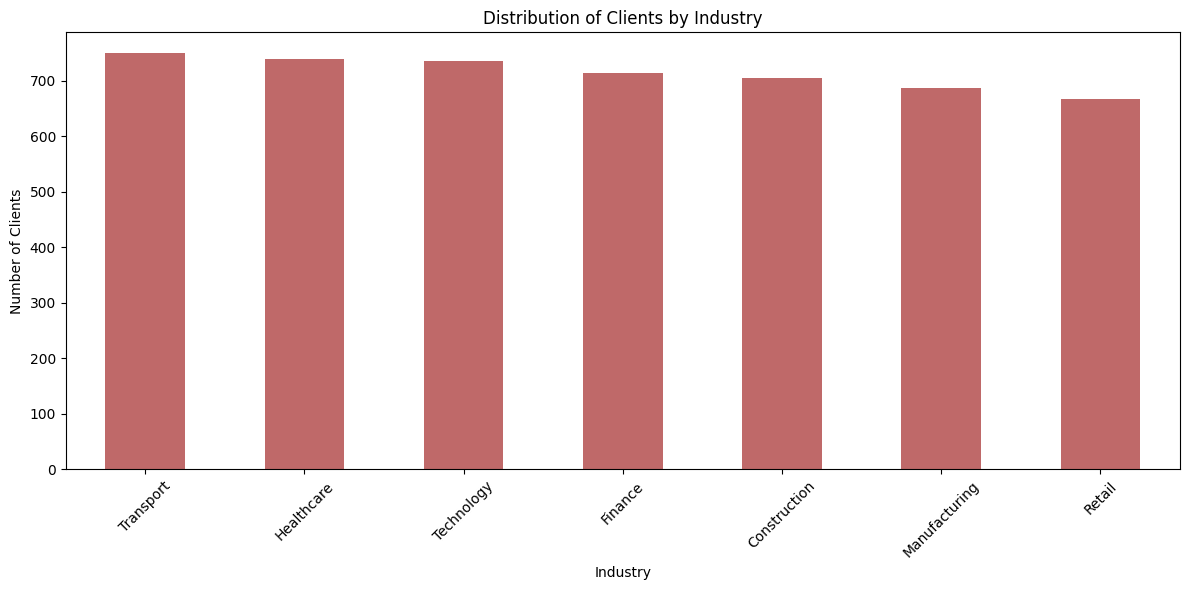

In [16]:
# 8. Industry distribution
plt.figure(figsize=(12, 6))
industry_counts = data['industry'].value_counts()
industry_counts.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Distribution of Clients by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

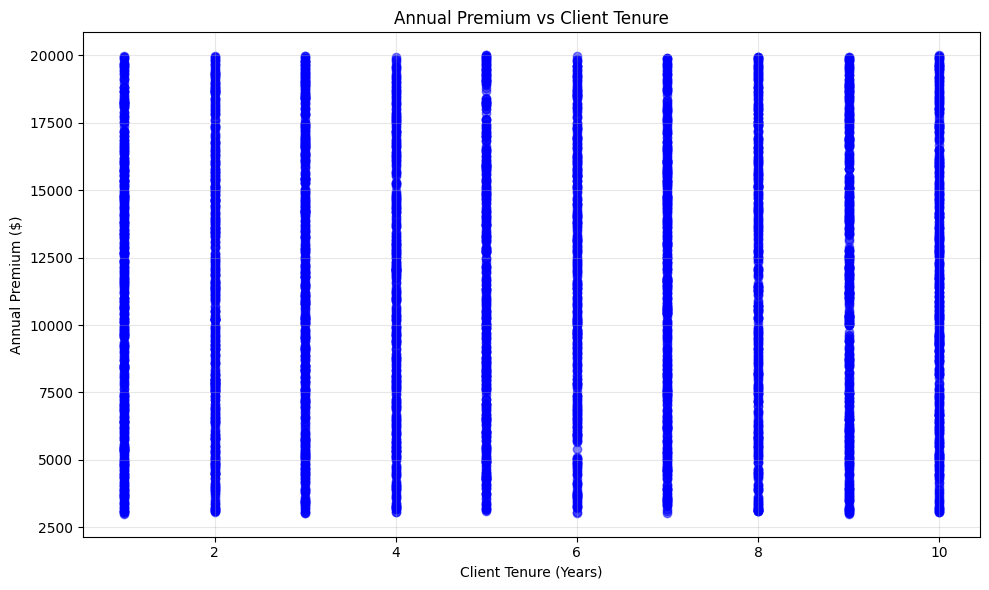

In [17]:
# 9. Scatter plot: Annual Premium vs Client Tenure
plt.figure(figsize=(10, 6))
plt.scatter(data['client_tenure_years'], data['annual_premium'], alpha=0.5, c='blue')
plt.title('Annual Premium vs Client Tenure')
plt.xlabel('Client Tenure (Years)')
plt.ylabel('Annual Premium ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

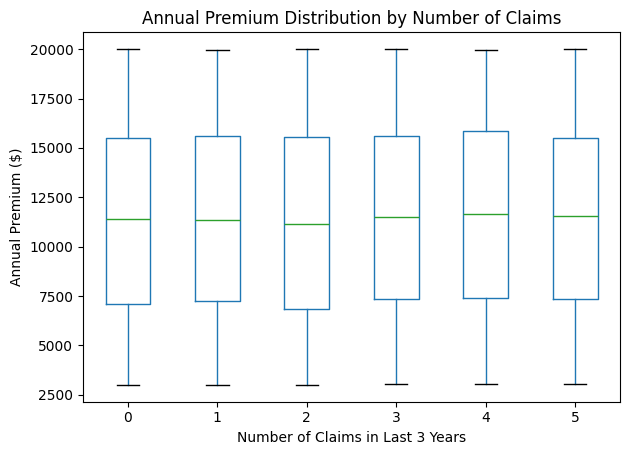

In [18]:
# 10. Box plot: Annual Premium by Number of Claims
plt.figure(figsize=(12, 6))
data.boxplot(column='annual_premium', by='claims_last_3_years', grid=False)
plt.title('Annual Premium Distribution by Number of Claims')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('Number of Claims in Last 3 Years')
plt.ylabel('Annual Premium ($)')
plt.tight_layout()
plt.show()

In [19]:
df = data

In [20]:
df.columns

Index(['client_id', 'client_name', 'policy_type', 'policy_start_date',
       'annual_premium', 'claims_last_3_years', 'communication_frequency',
       'client_tenure_years', 'last_contact_date', 'industry', 'region'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                5000 non-null   int64  
 1   client_name              5000 non-null   object 
 2   policy_type              5000 non-null   object 
 3   policy_start_date        5000 non-null   object 
 4   annual_premium           5000 non-null   float64
 5   claims_last_3_years      5000 non-null   int64  
 6   communication_frequency  5000 non-null   object 
 7   client_tenure_years      5000 non-null   int64  
 8   last_contact_date        5000 non-null   object 
 9   industry                 5000 non-null   object 
 10  region                   5000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 429.8+ KB


In [22]:
# df["client_name"].value_counts()
# df[df["client_name"] == 'Miller Ltd']

In [23]:
df.head()

,client_id,client_name,policy_type,policy_start_date,annual_premium,claims_last_3_years,communication_frequency,client_tenure_years,last_contact_date,industry,region
0,1001,"Rodriguez, Figueroa and Sanchez",Commercial Auto,2022-04-09,4811.91,0,Annually,6,2024-06-17,Construction,Durham
1,1002,Doyle Ltd,Commercial Auto,2017-05-10,10243.22,3,Quarterly,9,2024-09-02,Construction,Durham
2,1003,"Mcclain, Miller and Henderson",Property,2020-01-30,12951.29,0,Quarterly,6,2024-07-02,Technology,Durham
3,1004,Davis and Sons,General Liability,2022-12-18,7442.15,3,Annually,3,2024-07-15,Manufacturing,Durham
4,1005,"Guzman, Hoffman and Baldwin",General Liability,2018-11-13,12113.78,2,Annually,4,2025-04-11,Construction,Durham


In [24]:
df["policy_start_date"] = pd.to_datetime(df["policy_start_date"])
df["last_contact_date"] = pd.to_datetime(df["last_contact_date"])

In [25]:
# Calculate days since last contact using current date
import datetime
current_date = datetime.datetime.now()
df['days_since_last_contact'] = (current_date - df['last_contact_date']).dt.days

In [26]:
# Extract year from policy_start_date and create a new column
df['policy_start_year'] = df['policy_start_date'].dt.year
# Calculate new client tenure in years based on policy start year
current_year = datetime.datetime.now().year
df['new_client_tenure_year'] = current_year - df['policy_start_year']
df["new_client_tenure_year"] = df["new_client_tenure_year"].astype('Int64')


In [27]:
df.head()


,client_id,client_name,policy_type,policy_start_date,annual_premium,claims_last_3_years,communication_frequency,client_tenure_years,last_contact_date,industry,region,days_since_last_contact,policy_start_year,new_client_tenure_year
0,1001,"Rodriguez, Figueroa and Sanchez",Commercial Auto,2022-04-09,4811.91,0,Annually,6,2024-06-17,Construction,Durham,314,2022,3
1,1002,Doyle Ltd,Commercial Auto,2017-05-10,10243.22,3,Quarterly,9,2024-09-02,Construction,Durham,237,2017,8
2,1003,"Mcclain, Miller and Henderson",Property,2020-01-30,12951.29,0,Quarterly,6,2024-07-02,Technology,Durham,299,2020,5
3,1004,Davis and Sons,General Liability,2022-12-18,7442.15,3,Annually,3,2024-07-15,Manufacturing,Durham,286,2022,3
4,1005,"Guzman, Hoffman and Baldwin",General Liability,2018-11-13,12113.78,2,Annually,4,2025-04-11,Construction,Durham,16,2018,7


In [28]:
df.columns

Index(['client_id', 'client_name', 'policy_type', 'policy_start_date',
       'annual_premium', 'claims_last_3_years', 'communication_frequency',
       'client_tenure_years', 'last_contact_date', 'industry', 'region',
       'days_since_last_contact', 'policy_start_year',
       'new_client_tenure_year'],
      dtype='object')

In [29]:
drop_columns = ['client_id', 'client_name','policy_type', 'policy_start_date', 'client_tenure_years', 'last_contact_date', 'industry', 'region', 'policy_start_year']
df = df.drop(columns=drop_columns)

In [30]:
df.head()

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year
0,4811.91,0,Annually,314,3
1,10243.22,3,Quarterly,237,8
2,12951.29,0,Quarterly,299,5
3,7442.15,3,Annually,286,3
4,12113.78,2,Annually,16,7


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   annual_premium           5000 non-null   float64
 1   claims_last_3_years      5000 non-null   int64  
 2   communication_frequency  5000 non-null   object 
 3   days_since_last_contact  5000 non-null   int64  
 4   new_client_tenure_year   5000 non-null   Int64  
dtypes: Int64(1), float64(1), int64(2), object(1)
memory usage: 200.3+ KB


In [32]:
df["communication_frequency"].value_counts()

communication_frequency
Monthly      1714
Annually     1653
Quarterly    1633
Name: count, dtype: int64

In [33]:
df

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year
0,4811.91,0,Annually,314,3
1,10243.22,3,Quarterly,237,8
2,12951.29,0,Quarterly,299,5
3,7442.15,3,Annually,286,3
4,12113.78,2,Annually,16,7
...,...,...,...,...,...
4995,4655.90,1,Quarterly,248,4
4996,3254.01,1,Annually,291,8
4997,16027.39,4,Monthly,139,9
4998,8262.22,1,Annually,166,3


In [34]:
df["communication_frequency"].value_counts()


communication_frequency
Monthly      1714
Annually     1653
Quarterly    1633
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["communication_frequency"] = label_encoder.fit_transform(df["communication_frequency"])
df["communication_frequency"].value_counts()

df.head()

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year
0,4811.91,0,0,314,3
1,10243.22,3,2,237,8
2,12951.29,0,2,299,5
3,7442.15,3,0,286,3
4,12113.78,2,0,16,7


In [36]:
df["communication_frequency"].value_counts()
#0 - Annually
#1 - Monthly
#2 - Quarterly

communication_frequency
1    1714
0    1653
2    1633
Name: count, dtype: int64

## No multicolinearity exist!!

In [37]:
# # Calculate correlation matrix
# correlation_matrix = df.corr()

# # Create a heatmap for better visualization
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix of Features')
# plt.tight_layout()
# plt.show()

# # Find the most correlated features
# print("\nMost correlated feature pairs:")
# # Unstack the correlation matrix and sort it
# corr_pairs = correlation_matrix.unstack()
# # Sort correlation pairs in descending order
# sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
# # Remove self-correlations (which are always 1)
# high_corr = sorted_pairs[sorted_pairs < 1.0]
# print(high_corr.head(10))  # Print top 10 correlations


In [38]:

df.describe()

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year
count,5000.000000,5000.0000,5000.00000,5000.000000,5000.0
mean,11457.539956,2.5052,0.99600,188.448200,5.7954
std,4880.053279,1.6971,0.81075,106.623837,2.611303
min,3003.330000,0.0000,0.00000,4.000000,1.0
25%,7207.107500,1.0000,0.00000,95.000000,4.0
50%,11458.950000,3.0000,1.00000,190.000000,6.0
75%,15607.187500,4.0000,2.00000,281.000000,8.0
max,19999.220000,5.0000,2.00000,369.000000,10.0


In [39]:
df['churn_risk'] = (
    (df['claims_last_3_years'] == 0) &
    (df['annual_premium'] > df['annual_premium'].quantile(0.75)) &
    (df['new_client_tenure_year'] > 5) &
    (df['days_since_last_contact'] < 200)
).astype(int)

In [40]:
df.head()

,annual_premium,claims_last_3_years,communication_frequency,days_since_last_contact,new_client_tenure_year,churn_risk
0,4811.91,0,0,314,3,0
1,10243.22,3,2,237,8,0
2,12951.29,0,2,299,5,0
3,7442.15,3,0,286,3,0
4,12113.78,2,0,16,7,0


In [41]:
df["churn_risk"].value_counts()

churn_risk
0    4932
1      68
Name: count, dtype: int64

In [42]:
X = df.drop(columns=['churn_risk'])
y = df['churn_risk']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


In [44]:
# Training an XGBoost Model for Imbalanced Classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Compute the positive class weight
# pos_class_weight = (len(y) - np.sum(y)) / np.sum(y)

# Initialize XGBClassifier with scale_pos_weight and max_delta_step
model = XGBClassifier(
    random_state=42
)

# Fit the model
model.fit(X_train, y_train)

# Generate predictions
predictions = model.predict(X_test)
pred = model.predict_proba(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[986   0]
 [  0  14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00        14

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [48]:
# Predict risk scores (probability of not renewing, class 0)
data['risk_score'] = model.predict_proba(X)[:, 0]

# Select top 10 high-risk clients
top_10_risk = data[['client_id', 'client_name', 'policy_type', 'policy_start_date',
       'annual_premium', 'claims_last_3_years', 'communication_frequency',
       'client_tenure_years', 'last_contact_date', 'industry', 'region',
       'days_since_last_contact', 'policy_start_year',
       'new_client_tenure_year', 'risk_score']].sort_values(by='risk_score', ascending=False).head(10)
print("Top 10 Clients at Risk of Not Renewing:")
top_10_risk

Top 10 Clients at Risk of Not Renewing:


,client_id,client_name,policy_type,policy_start_date,annual_premium,claims_last_3_years,communication_frequency,client_tenure_years,last_contact_date,industry,region,days_since_last_contact,policy_start_year,new_client_tenure_year,risk_score
4203,5204,Johnson Group,Property,2022-01-19,9742.96,0,Monthly,8,2024-10-09,Retail,Durham,200,2022,3,0.999987
1010,2011,Davis and Sons,Property,2020-11-19,3952.38,0,Monthly,9,2024-10-09,Construction,Durham,200,2020,5,0.999987
2169,3170,Pittman PLC,General Liability,2022-07-20,6006.78,0,Monthly,5,2024-10-03,Transport,Whitby,206,2022,3,0.999987
2552,3553,Palmer-Pearson,General Liability,2020-12-08,10994.21,3,Monthly,4,2024-04-29,Retail,Durham,363,2020,5,0.999987
543,1544,Donovan-Perez,Cyber,2020-12-05,13765.09,5,Monthly,7,2024-08-17,Transport,Durham,253,2020,5,0.999987
4165,5166,Bell-Medina,Errors & Omissions,2023-10-10,12316.17,1,Monthly,3,2024-06-30,Construction,Oshawa,301,2023,2,0.999987
30,1031,Burton Ltd,Property,2023-01-02,14637.60,3,Monthly,3,2024-07-12,Technology,Ajax,289,2023,2,0.999987
2599,3600,Oneal-Duncan,Errors & Omissions,2021-08-14,13580.20,1,Monthly,7,2024-05-01,Transport,Whitby,361,2021,4,0.999987
547,1548,"Moore, Hopkins and Le",Cyber,2023-10-28,12275.65,2,Monthly,1,2024-06-03,Manufacturing,Durham,328,2023,2,0.999987
4431,5432,"Whitehead, Hernandez and Shah",Errors & Omissions,2023-01-13,11423.63,4,Monthly,8,2024-07-20,Transport,Whitby,281,2023,2,0.999987
